In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Known data points
X = np.array([-2, -1, 1, 2], dtype=np.float32)
Y = np.array([6, 4, 0, -2], dtype=np.float32)

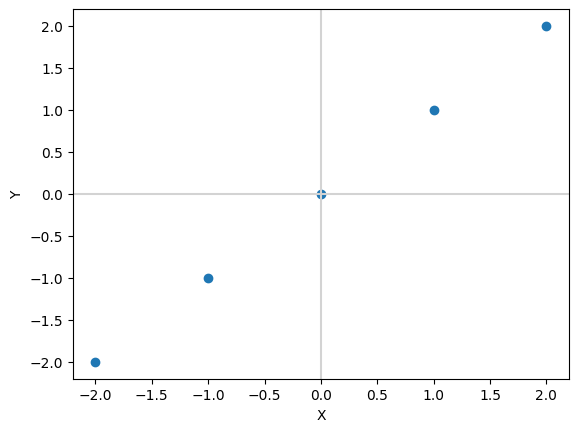

In [3]:
# Graph of the known data points
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axhline(color='lightgray')
ax.axvline(color='lightgray')

Forward Pass Function  
$\hat{y}=wx$

In [47]:
# model prediction
def forward(w, x, b):
    return w * x + b

[-1.  -0.5  0.5  1. ]


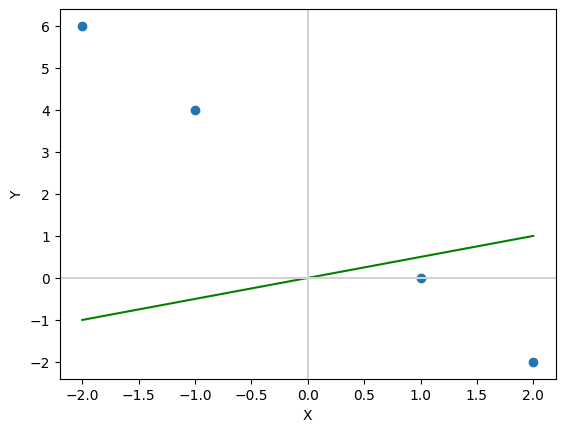

In [42]:
# Start with a random weight.
w=0.5

# Calculate predicted y values
y_predicted = forward(w, X)
print(y_predicted)

# Graph actual vs prediction
plt.figure()
ax = plt.subplot()
ax.scatter(X, Y)
ax.plot(X, y_predicted, 'green')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axhline(color='lightgray')
ax.axvline(color='lightgray')

Loss Function  
Mean Square Error  
$MSE({y},\hat{y}) = \frac{1}{n} \Sigma_{i=1}^n({y}_i-\hat{y}_i)^2$

In [5]:
# MSE
def loss(y, y_predicted):
    return ((y - y_predicted)**2).mean()

Illustrate how weights affect losses

[-0.5, 0, 0.5, 1.5, 2, 2.5]
[4.5, 2.0, 0.5, 0.5, 2.0, 4.5]


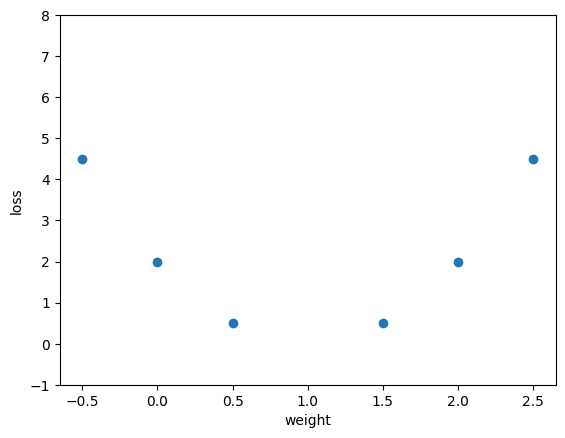

In [7]:
# Pick a bunch of random weights
W=[-0.5, 0, 0.5, 1.5, 2, 2.5]

# List store the calculated losses
L=[]

# Calculate loss for each w
for w in W: 
    y_predicted = forward(w, X)
    L.append(loss(Y, y_predicted))

print(W)
print(L)

# Graph loss with respect to weight
plt.figure()
ax = plt.subplot()
ax.set_xlabel('weight')
ax.set_ylabel('loss')
ax.set_ylim(-1, 8)
ax.scatter(W, L)

Change in Loss with respect to Weight  
$\frac{\delta l}{\delta w} = \frac{1}{n}2x \Sigma_{i=1}^n(\hat{y}_i-{y}_i)$  

In [8]:
# gradient of loss wrt weight
def gradient_dl_dw(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

[-30.0, -20.0, -10.0, 10.0, 20.0, 30.0]


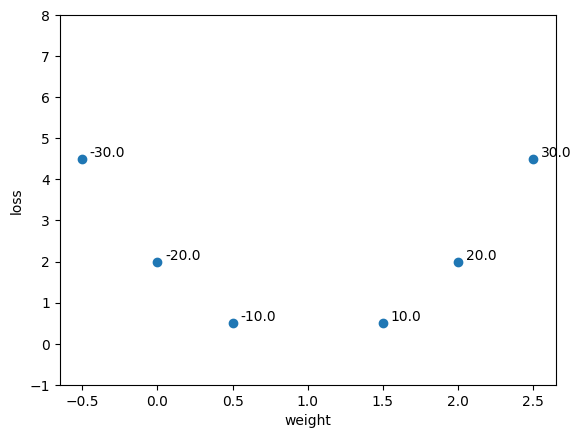

In [9]:
# Pick a bunch of random weights
W=[-0.5, 0, 0.5, 1.5, 2, 2.5]

# List store the calculated losses
L=[]

# List store the calculated gradients
G=[]

# Calculate loss and gradient for each w
for w in W: 
    y_predicted = forward(w, X)
    L.append(loss(Y, y_predicted))
    G.append(gradient_dl_dw(X, Y, y_predicted))

print(G)

plt.figure()
ax = plt.subplot()
ax.set_xlabel('weight')
ax.set_ylabel('loss')
ax.set_ylim(-1, 8)
ax.scatter(W, L)

# Add gradient labels next to each point
for i, g in enumerate(G):
    plt.text(W[i]+.05, L[i]+.05, g, fontsize=10)

Change in Loss with respect to Bias  
$\frac{\delta l}{\delta b} = \frac{1}{n}2 \Sigma_{i=1}^n(\hat{y}_i-{y}_i)$  

In [43]:
def gradient_dl_db(x, y, y_predicted):
    return np.dot(2, y_predicted-y).mean()

In [58]:
# Training
learning_rate = 0.01
epochs = 500

w = 10
b = 10
for epoch in range(epochs):
    # forward pass
    # calculate predictions
    y_predicted = forward(w, X, b)

    # calculate losses
    l = loss(Y, y_predicted)

    # backpropagation
    # calculate gradients
    dw = gradient_dl_dw(X,Y, y_predicted)

    db = gradient_dl_db(X, Y, y_predicted)

    # gradient descent
    # update weights
    w -= learning_rate * dw

    b -= learning_rate * db

    # print info
    if(epoch % 1==0):
        print(f'epoch {epoch+1}: w={w:.3f}, b={b:.3f}, loss={l:0.8f}, dw={dw:.3f}, forward(10)={forward(w,10,b):0.3f}')
    

epoch 1: w=7.600, b=9.840, loss=424.00000000, dw=240.000, forward(10)=85.840
epoch 2: w=5.680, b=9.683, loss=291.86560059, dw=192.000, forward(10)=66.483
epoch 3: w=4.144, b=9.530, loss=206.48754883, dw=153.600, forward(10)=50.970
epoch 4: w=2.915, b=9.379, loss=151.06575012, dw=122.880, forward(10)=38.531
epoch 5: w=1.932, b=9.231, loss=114.84682465, dw=98.304, forward(10)=28.553
epoch 6: w=1.146, b=9.087, loss=90.94735718, dw=78.643, forward(10)=20.544
epoch 7: w=0.517, b=8.945, loss=74.96087646, dw=62.915, forward(10)=14.111
epoch 8: w=0.013, b=8.806, loss=64.06605530, dw=50.332, forward(10)=8.939
epoch 9: w=-0.389, b=8.670, loss=56.45614624, dw=40.265, forward(10)=4.776
epoch 10: w=-0.712, b=8.537, loss=50.97384644, dw=32.212, forward(10)=1.421
epoch 11: w=-0.969, b=8.406, loss=46.87742233, dw=25.770, forward(10)=-1.286
epoch 12: w=-1.175, b=8.278, loss=43.69125366, dw=20.616, forward(10)=-3.476
epoch 13: w=-1.340, b=8.152, loss=41.10999298, dw=16.493, forward(10)=-5.251
epoch 14: 